In [78]:
import pandas as pd
import matplotlib.pyplot as plt

data_cfns = pd.read_csv('occurr_csv/0116466-230530130749713.csv', sep='\t')
data_taur = pd.read_csv('occurr_csv/0116631-230530130749713.csv', sep='\t')
data_lign = pd.read_csv('occurr_csv/0116458-230530130749713.csv', sep='\t')
data_lign = data_lign[data_lign['species'] == 'Osmia lignaria']


/tmp/ipykernel_644725/4288185563.py:6: DtypeWarning: Columns (39,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data_lign = pd.read_csv('occurr_csv/0116458-230530130749713.csv', sep='\t')


In [39]:
columns = ['decimalLatitude', 'decimalLongitude', 'year']
extent = [-131.53, -61.46, 24.09, 54.90]

data_lign = data_lign[columns]
data_lign = data_lign.dropna()
data_lign = data_lign[(data_lign['decimalLatitude']>0) & (data_lign['decimalLongitude']<-60)]

data_cfns = data_cfns[columns]
data_cfns = data_cfns.dropna()
data_cfns = data_cfns[(data_cfns['decimalLatitude']>0) & (data_cfns['decimalLongitude']<-60)]

data_taur = data_taur[columns]
data_taur = data_taur.dropna()
data_taur = data_taur[(data_taur['decimalLatitude']>0) & (data_taur['decimalLongitude']<-60)]


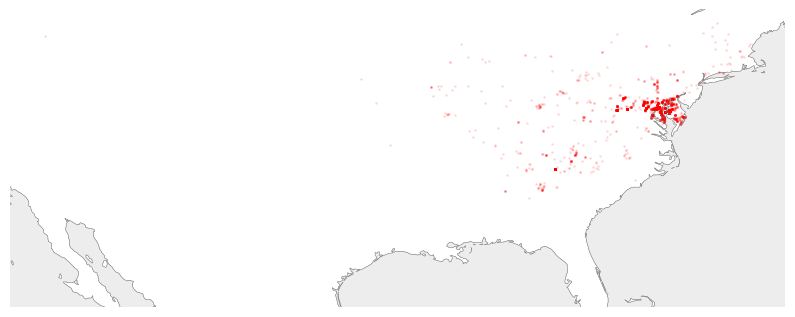

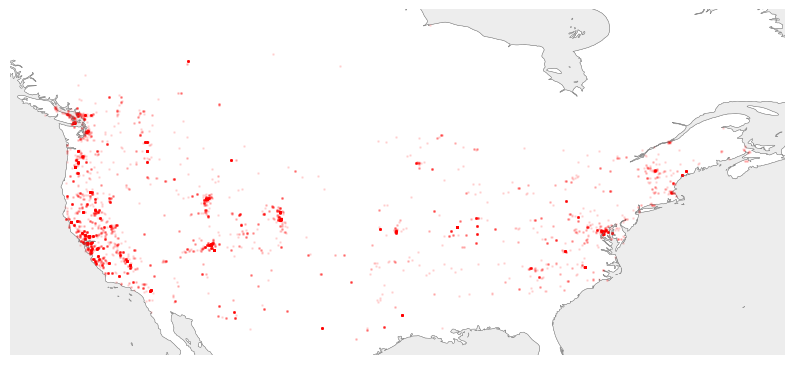

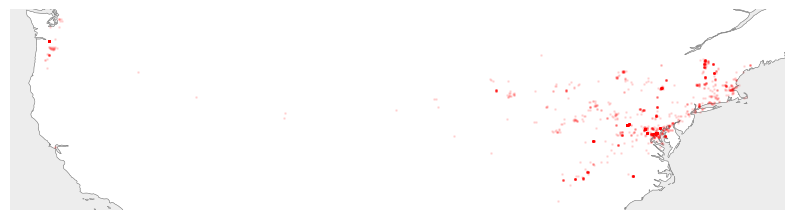

In [41]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs

for df in [data_taur, data_lign, data_cfns]:
    plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax = plt.gca()

    ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
    ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')

    ax.scatter(df['decimalLongitude'], df['decimalLatitude'], transform=ccrs.PlateCarree(), marker='o', color='red', s=1, alpha=.1)
    ax.axis('off')

In [61]:
counts_lig = data_lign['year'][data_lign['year'] > 1960].value_counts()
counts_lig = counts_lig.sort_index().cumsum()

counts_cfns = data_cfns['year'][data_cfns['year'] > 1960].value_counts()
counts_cfns = counts_cfns.sort_index().cumsum()

counts_taur = data_taur['year'][data_taur['year'] > 1960].value_counts()
counts_taur = counts_taur.sort_index().cumsum()

counts = {'lignaria': counts_lig, 'cornifrons': counts_cfns, 'taurus': counts_taur}
counts_df = pd.DataFrame(counts)

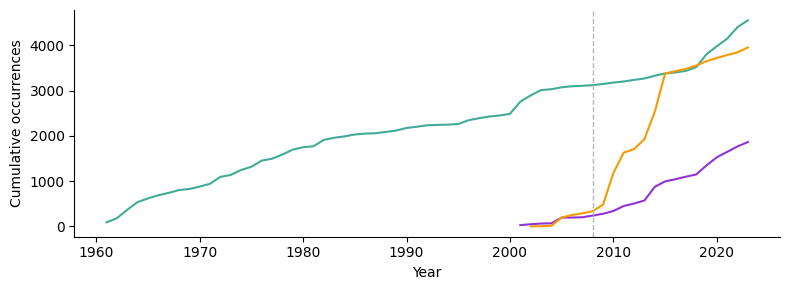

In [77]:
# colors = [['#a5dfd5', '#ddf0ed', '#41ab99'], ['#ffd894', '#f7dfb5', '#f59b00'], ['#cb89fa', '#e0c1f7', '#9133d4']]
colors = ['#41ab99', '#9133d4', '#f59b00']

plt.figure(figsize=(8, 3)) 
for i, column in enumerate(counts_df.columns):
    plt.plot(counts_df.index, counts_df[column], color=colors[i], label = column)

# plt.legend()
plt.xlabel('Year')
plt.ylabel('Cumulative occurrences')

ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(x=2008, color='#b7b7b8', linestyle='--', linewidth=1)


plt.tight_layout()

plt.savefig('../figures/svg/obsv_timeseries.svg', format='svg')